In [947]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score

In [948]:
pre_len = 12

model_type = "dcrnn"
type_predict = "test"
adj_type = "bad"
service = "cart"
type_data = "duration"



num_nodes = 3
list_model_type = ["HA", "SVR", "lstm", "gru"]
list_model_type = ["tgcn", "a3tgcn", "stgcn", "dcrnn"]

unit_dict = {
    "calls": "QPS",
    "duration": "Response time (95% quantile)",
}

nodes = [
    "adservice", "cartservice", "checkoutservice", "currencyservice",
    "emailservice", "featureflagservice", "frontend", "paymentservice", 
    "productcatalogservice", "quoteservice", "recommendationservice", "shippingservice",
]

data_path = f"../result_predict/microservices/{adj_type}/{service}/{type_data}/{pre_len}/{model_type}/{type_predict}.npy"

In [949]:
def read_data(data_path: str, n_dim = 3):
    predict_data_3d = np.load(data_path)
    if n_dim == 3:
        return predict_data_3d
    if n_dim == 2:
        return np.reshape(predict_data_3d, [-1, num_nodes])
    if n_dim == 1:
        return predict_data_3d.flatten()

In [950]:
def read_full_data(adj_type, service, type_data, pre_len, type_predict="test"):

    model_predicts_3d = {}
    model_predicts_2d = {}
    model_predicts_1d = {}

    data_path = f"../result_predict/microservices/{adj_type}/{service}/{type_data}/{pre_len}/ground_truth/{type_predict}.npy"
    ground_truth_3d = read_data(data_path=data_path, n_dim=3)
    ground_truth_2d = read_data(data_path=data_path, n_dim=2)
    ground_truth_1d = read_data(data_path=data_path, n_dim=1)

    for model_type in list_model_type:
        data_path = f"../result_predict/microservices/{adj_type}/{service}/{type_data}/{pre_len}/{model_type}/{type_predict}.npy"
        model_predicts_3d[model_type] = read_data(data_path=data_path, n_dim=3)
        model_predicts_2d[model_type] = read_data(data_path=data_path, n_dim=2)
        model_predicts_1d[model_type] = read_data(data_path=data_path, n_dim=1)
    
    return ground_truth_3d, ground_truth_2d, ground_truth_1d, model_predicts_3d, model_predicts_2d, model_predicts_1d

ground_truth_3d, ground_truth_2d, ground_truth_1d, model_predicts_3d, model_predicts_2d, model_predicts_1d = read_full_data(
    adj_type=adj_type,
    service=service,
    type_data=type_data,
    pre_len=pre_len,
)

In [951]:
for model_type in list_model_type:
    print(model_type, model_predicts_3d[model_type].shape)

tgcn (373, 12, 12)
a3tgcn (373, 12, 12)
stgcn (373, 12, 12)
dcrnn (373, 12, 12)


### Графики по датчику

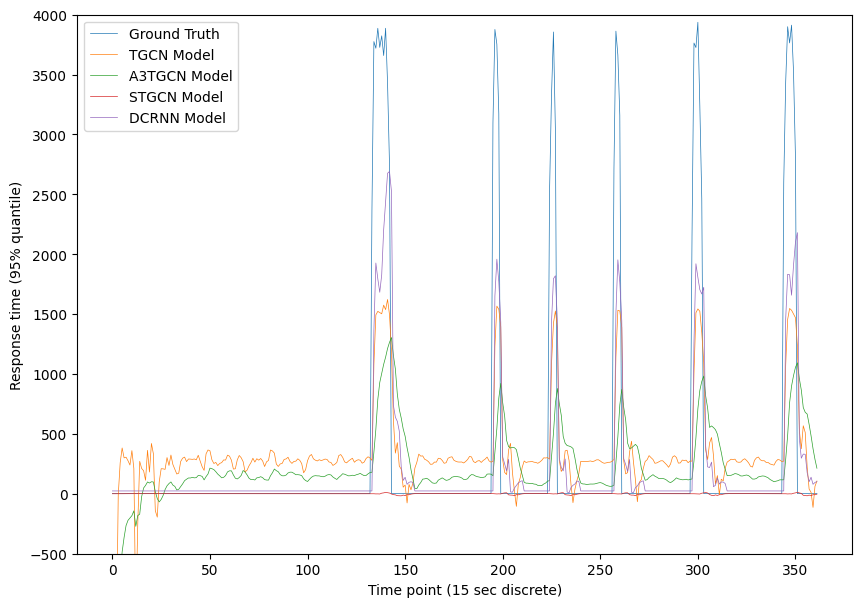

In [952]:
node_idx = 1 # max 12
start_timestamp = 10
end_timestamp = -1
pre_idx = 0

plt.figure(figsize=(10,7))
plt.plot(
    ground_truth_3d[start_timestamp:end_timestamp, node_idx, pre_idx],
    linewidth=0.5,
    label="Ground Truth",
)
for model_type in list_model_type:
    plt.plot(
        model_predicts_3d[model_type][start_timestamp:end_timestamp, node_idx, pre_idx],
        linewidth=0.5,
        label=f"{model_type.upper()} Model",
    )

# plt.title(f"Microservices, horizon {pre_len}")
# plt.figtext(
#     x=0.77,
#     y=0.75,
#     s=f"""sensor_num={node_idx}, \nstart_timestamp={start_timestamp}, \nend_timestamp={end_timestamp}, \nfault_service={service}, \nadj_type={adj_type}""",
#     color="grey",
#     ha="left",
#     fontsize=7,
#     bbox={"facecolor": "orange", "alpha":0.5, "pad": 5}
# )
plt.ylim([-500, 4000])
plt.xlabel("Time point (15 sec discrete)")
plt.ylabel(unit_dict[type_data])
plt.legend(loc="upper left")
plt.show()

### train_test

In [953]:
# ground_truth_3d_train, ground_truth_2d_train, ground_truth_1d_train, model_predicts_3d_train, model_predicts_2d_train, model_predicts_1d_train = read_full_data(
#     adj_type=adj_type,
#     service=service,
#     type_data=type_data,
#     pre_len=pre_len,
#     type_predict="train",
# )

In [954]:
# node_idx = 1 # max 12
# start_timestamp = 0
# end_timestamp = -1
# pre_idx = 0

# plt.figure(figsize=(10,7))
# plt.plot(
#     np.vstack([ground_truth_3d_train, ground_truth_3d])[start_timestamp:end_timestamp, node_idx, pre_idx],
#     linewidth=0.3,
#     label="Ground Truth",
# )
# for model_type in list_model_type:
#     plt.plot(
#         np.vstack([model_predicts_3d_train[model_type], model_predicts_3d[model_type]])[start_timestamp:end_timestamp, node_idx, pre_idx],
#         linewidth=0.3,
#         label=f"{model_type.upper()} Model",
#     )

# plt.title(f"Microservices, horizon {pre_len}")
# plt.figtext(
#     x=0.77,
#     y=0.75,
#     s=f"""sensor_num={node_idx}, \nstart_timestamp={start_timestamp}, \nend_timestamp={end_timestamp}, \nfault_service={service}, \nadj_type={adj_type}""",
#     color="grey",
#     ha="left",
#     fontsize=7,
#     bbox={"facecolor": "orange", "alpha":0.5, "pad": 5}
# )
# plt.axvline(x=ground_truth_3d_train.shape[0], color='purple', linestyle='dotted')
# plt.xlabel("Time point (15 sec discrete)")
# plt.ylabel(unit_dict[type_data])
# plt.legend(loc="upper left")
# plt.show()

### Графики по временной метке

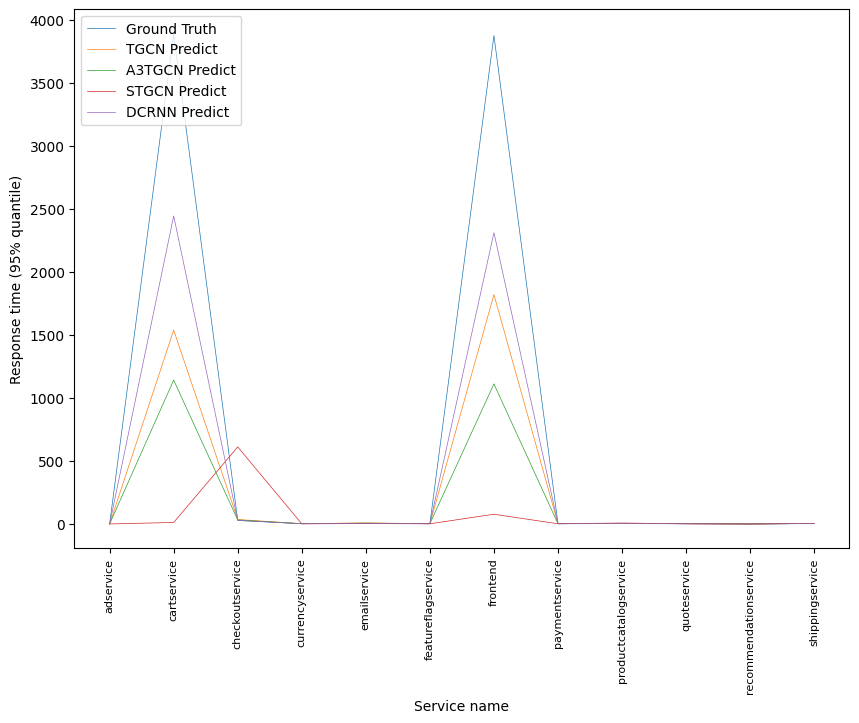

In [955]:
timestamp_idx = 150
pre_idx = 0

plt.figure(figsize=(10,7))
plt.plot(
    ground_truth_3d[timestamp_idx, :, pre_idx],
    linewidth=0.5,
    label="Ground Truth",
)
for model_type in list_model_type:
    if model_type == "ground_truth":
        label = "Ground Truth"
    else:
        label = f"{model_type.upper()} Predict"
    plt.plot(
        model_predicts_3d[model_type][timestamp_idx, :, pre_idx],
        linewidth=0.5,
        label=label,
    )

# plt.title(f"METR-LA, horizon {pre_len}")
# plt.figtext(
#     x=0.76,
#     y=0.80,
#     s=f"timestamp_num={timestamp_idx}",
#     color="grey",
#     ha="left",
#     fontsize=7,
#     bbox={"facecolor": "orange", "alpha":0.5, "pad": 5}
# )
plt.xlabel("Service name")
plt.ylabel(unit_dict[type_data])
plt.xticks(range(0,12), nodes, rotation ='vertical', fontsize=8)
plt.legend(loc="upper left")
plt.show()

### Расчет метрик

In [956]:
def mae(y_true_2d, y_pred_2d):
    return np.round(mean_absolute_error(y_true=y_true_2d, y_pred=y_pred_2d), 2)


def rmse(y_true_2d, y_pred_2d):
    return np.round(np.sqrt(mean_squared_error(y_true=y_true_2d, y_pred=y_pred_2d)), 2)


def r2(y_true_2d, y_pred_2d):
    return np.round(r2_score(y_true=y_true_2d, y_pred=y_pred_2d), 2) 


def smape(y_true_1d, y_pred_1d):
    return np.round(100/len(y_true_1d) * np.sum(np.abs(y_pred_1d - y_true_1d) / (np.abs(y_true_1d) + np.abs(y_pred_1d))), 2)


def get_all_metrics(gt_2d, pre_2d, gt_1d, pre_1d):
    metrics = {}
    metrics["mae"] = "{:0.4f}".format(mae(gt_2d, pre_2d))
    metrics["rmse"] = "{:0.4f}".format(rmse(gt_2d, pre_2d))
    metrics["smape"] = "{:0.4f}".format(smape(gt_1d, pre_1d))
    metrics["r2"] = "{:0.4f}".format(r2(gt_2d, pre_2d))
    
    return metrics

In [957]:
metrics = {}

for model_type in list_model_type:
    pre_2d = model_predicts_2d[model_type]
    pre_1d = model_predicts_1d[model_type]
    
    zero_values_idxs = np.where(ground_truth_1d < 0.001)
    ground_truth_1d_no_zeros = np.delete(ground_truth_1d, zero_values_idxs)
    pre_1d_no_zeros = np.delete(pre_1d, zero_values_idxs)
    
    metrics[model_type] = get_all_metrics(ground_truth_2d, pre_2d, ground_truth_1d_no_zeros, pre_1d_no_zeros)

In [958]:
pd.DataFrame(metrics).T

,mae,rmse,smape,r2
tgcn,86.9900,414.3700,23.4100,0.0500
a3tgcn,84.6100,431.5400,23.8000,-0.0300
stgcn,65.9000,436.3000,26.2500,-0.0600
dcrnn,76.2900,424.3700,18.6800,-0.0000


### Расчет метрик для каждого сервиса отдельно

In [959]:
def get_df_metrics_from_np(metrics_array):
    header = pd.MultiIndex.from_product(
        iterables=[list_model_type, nodes],
        names=['model_name','service_name'],
    )
    df = pd.DataFrame(
        metrics_array,
        index=['mae','rmse','smape','r2'], 
        columns=header,
    )
    return df

In [960]:
def z_norm(data):
    new_data = (data - data.mean()) /data.std()
    return np.nan_to_num(new_data, 0)

In [961]:
def get_individual_metrics(ground_truth_3d, model_predicts_3d):
    list_metrics = []

    for model_type in list_model_type:
        for node_idx, service_name in enumerate(nodes):
            gt_2d = ground_truth_3d[:, node_idx, :]
            pre_2d = model_predicts_3d[model_type][:, node_idx, :]
            
            gt_2d = z_norm(gt_2d)
            pre_2d = z_norm(pre_2d)
            
            metrics = get_all_metrics(gt_2d=gt_2d, gt_1d=gt_2d, pre_1d=pre_2d, pre_2d=pre_2d)
            list_metrics.append(list(metrics.values()))

    list_metrics = np.array(list_metrics).T.astype(float)
    
    return list_metrics

In [962]:
m = get_df_metrics_from_np(get_individual_metrics(ground_truth_3d=ground_truth_3d, model_predicts_3d=model_predicts_3d)).T
m.to_excel("df.xlsx", index=False, header=False)
# print(get_individual_metrics(ground_truth_3d=ground_truth_3d, model_predicts_3d=model_predicts_3d).T)

/home/dam/diplom/.venv37/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  
/home/dam/diplom/.venv37/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  
/home/dam/diplom/.venv37/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  
/home/dam/diplom/.venv37/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  
/home/dam/diplom/.venv37/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  
/home/dam/diplom/.venv37/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  
/home/dam/diplom/.venv37/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  
/home/dam/diplom/.venv37/lib/py

In [963]:
# save_path = f"../result_predict/microservices/result_metrics/{adj_type}/{service}/{type_data}/{pre_len}/metrics.npy"
# get_df_metrics_from_np(np.load(save_path))

In [964]:
# for adj_type in ("good", "bad"):
#     for service in ("no", "cart", "currency", "product"):
#         for type_data in ("calls", "duration"):
#             for pre_len in (3, 6, 12):
#                 print(adj_type, service, type_data, pre_len)
#                 ground_truth_3d, _, _, model_predicts_3d, _, _ = read_full_data(
#                     adj_type=adj_type,
#                     service=service,
#                     type_data=type_data,
#                     pre_len=pre_len,
#                 )
#                 list_metrics = get_individual_metrics(ground_truth_3d, model_predicts_3d)
#                 save_path = f"../result_predict/microservices/result_metrics/{adj_type}/{service}/{type_data}/{pre_len}/metrics.npy"
#                 np.save(save_path, list_metrics)

In [965]:
adj_type = "good"
service = "no"
type_data = "calls"
metrics_path = f"../result_predict/microservices/result_metrics/{adj_type}/{service}/{type_data}"

for pre_len in (3, 6, 12):
    df_metrics = get_df_metrics_from_np(np.load(f"{metrics_path}/{pre_len}/metrics.npy"))
    # df_metrics = df_metrics.fillna(0)
    
    # for service_name in nodes:
    #     for model in model_type:
    #         min_max_metrics[service_name] = {}
    #         min_max_metrics[service_name][model] = {}
    #         for metric in ("mae", "rmse", "smape", "r2"):
    #         min_max_metrics[service_name][model][metric] = {}
    #         min_max_metrics[service_name][model][metric]["min"] = -np.inf
    #         min_max_metrics[service_name][model][metric]["max"] = np.inf
    #         df_metrics[service_name][model][metric]
                
            

In [966]:
values = {}
model = "dcrnn"

drop_nodes = 

for service_name in nodes:
    values[service_name] = {}
    for metric in ("mae", "rmse", "smape", "r2"):
        values[service_name][metric] = []
        for pre_len in (3, 6, 12):
            df_metrics = get_df_metrics_from_np(np.load(f"{metrics_path}/{pre_len}/metrics.npy"))
            df_metrics = df_metrics.fillna(0)
            values[service_name][metric].append(df_metrics[service_name][model][metric])

    
    

SyntaxError: invalid syntax (2360252688.py, line 4)

In [ ]:
values

{'adservice': {'mae': [0.0, 0.0, 0.0],
  'rmse': [0.0, 0.0, 0.0],
  'smape': [0.0, 0.0, 0.0],
  'r2': [1.0, 1.0, 1.0]},
 'cartservice': {'mae': [62.921600341796875,
   72.34120178222656,
   90.33209991455078],
  'rmse': [92.19280242919922, 107.67060089111328, 131.90359497070312],
  'smape': [85.47704011491201, 175.19722732843138, 366.1404622395833],
  'r2': [0.9388, 0.9151, 0.8676]},
 'checkoutservice': {'mae': [31.807600021362305,
   33.16170120239258,
   36.971099853515625],
  'rmse': [45.20349884033203, 46.4739990234375, 49.8765983581543],
  'smape': [94.40751060313005, 188.458251953125, 378.90128580729163],
  'r2': [0.9075, 0.9005, 0.8812]},
 'currencyservice': {'mae': [7.37939977645874,
   7.682799816131592,
   8.596099853515625],
  'rmse': [10.805700302124023, 11.095499992370605, 11.78969955444336],
  'smape': [94.3154146756169, 188.47023957695058, 379.3887939453125],
  'r2': [0.9022, 0.8952, 0.877]},
 'emailservice': {'mae': [2.960099935531616,
   3.07069993019104,
   3.38870000

In [ ]:
df_metrics

service_name adservice                   cartservice                          \
model_name       dcrnn tgcn a3tgcn stgcn       dcrnn        tgcn      a3tgcn   
mae                0.0  0.0    0.0   0.0   90.332100  147.794006  154.314300   
rmse               0.0  0.0    0.0   0.0  131.903595  197.065002  187.111800   
smape              0.0  0.0    0.0   0.0  366.140462  587.275309  636.860975   
r2                 1.0  1.0    1.0   1.0    0.867600    0.707100    0.736900   

service_name             checkoutservice              ... quoteservice  \
model_name         stgcn           dcrnn        tgcn  ...       a3tgcn   
mae           180.436905       36.971100   65.294197  ...     5.707000   
rmse          219.942001       49.876598   96.682404  ...     6.982100   
smape         616.028768      378.901286  415.849569  ...   432.982588   
r2              0.635200        0.881200    0.554200  ...     0.723300   

service_name             recommendationservice                    \
model_name         stgcn                 dcrnn tgcn a3tgcn stgcn   
mae             4.407400                   0.0  0.0    0.0   0.0   
rmse            5.658900                   0.0  0.0    0.0   0.0   
smape         432.150146                   0.0  0.0    0.0   0.0   
r2              0.817800                   1.0  1.0    1.0   1.0   

service_name shippingservice                                      
model_name             dcrnn        tgcn      a3tgcn       stgcn  
mae                 9.662500   13.165600   11.685000   14.722600  
rmse               12.945000   18.543699   15.481200   17.817400  
smape             380.984294  400.925781  444.099003  571.585286  
r2                  0.887900    0.770400    0.840400    0.789400  

[4 rows x 48 columns]